Code builds and trains CNN to classify images from the CIFAR-10 dataset.

Data can be found here:
http://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#unflatten row to np arrays of red, green, and blue values for each pixel
def rgb(array):
    temp =[]
    count = 0
    while count < 1024:
        temp.append(array[count])
        temp.append(array[(count+1024)])
        temp.append(array[(count+2048)])
        count += 1
    final = np.array(temp)
    final = np.reshape(final, (32,32,3))
    
    return final

In [3]:
#unflatten array
def ufa(input_array):
    output_array = np.empty(shape=(input_array.shape[0],32,32,3))   
    count = 0
    while count < input_array.shape[0]:
        #unflattens every row in the input array
        output_array[count] = rgb(input_array[count])
        count +=1
    return output_array.astype(int)

In [4]:
#method to unpickle files
def unpickle(file):
    import cPickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

In [5]:
#unpickle files downloaded from http://www.cs.toronto.edu/~kriz/cifar.html
db1 = unpickle('cifar-10-batches-py\\data_batch_1')
db2 = unpickle('cifar-10-batches-py\\data_batch_2')
db3 = unpickle('cifar-10-batches-py\\data_batch_3')
db4 = unpickle('cifar-10-batches-py\\data_batch_4')
db5 = unpickle('cifar-10-batches-py\\data_batch_5')
db_test = unpickle('cifar-10-batches-py\\test_batch')

In [6]:
db_all_labels = np.concatenate([db1['labels'],db2['labels'],db3['labels'],db4['labels'],db5['labels']])

#flattened data inputs for most models
X_train_flat = np.vstack([db1['data'],db2['data'],db3['data'],db4['data'],db5['data']])
X_test_flat=db_test['data']

#unflattened data is for CNN model
X_train_uf = ufa(X_train_flat)
#convert labels to one hot encoding
y_train = np.eye(10)[db_all_labels]

X_test_uf = ufa(X_test_flat)
y_test = np.eye(10)[db_test['labels']]

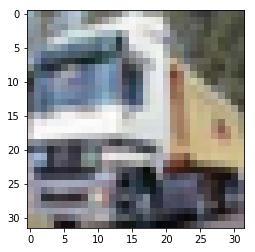

In [7]:
#test images for unflattened data
plt.imshow(X_train_uf[1]);

In [8]:
#
#Build CNN
#
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.regularizers import l2, l1
from keras.optimizers import SGD

model = Sequential()
model.add(Convolution2D(32, (4,4), strides = (2,2), border_mode='valid', 
                        input_shape=X_train_uf.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100, activation='relu',W_regularizer=l2(0.01)))
model.add(Dense(100, activation='relu',W_regularizer=l2(0.01)))
model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Using Theano backend.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named mkl
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\zacha\AppData\Local\Continuum\anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (4, 4), padding="valid", strides=(2, 2), activation="relu", input_shape=(32L, 32L,...)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\zacha\AppData\Local\Continuum\anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
C:\Users\zacha\AppData\Local\Continuum\anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_regula

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 15L, 15L, 32)      1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7L, 7L, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7L, 7L, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               156900    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total para

In [10]:
history = model.fit(X_train_uf, y_train, batch_size = 1000,
          nb_epoch = 50, verbose=1, validation_data=(X_test_uf,y_test))

C:\Users\zacha\AppData\Local\Continuum\anaconda3\envs\py2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 280us/step - loss: 9.6326 - acc: 0.1670 - val_loss: 4.3976 - val_acc: 0.1883
Epoch 2/50
50000/50000 [==============================] - 13s 263us/step - loss: 3.9384 - acc: 0.2877 - val_loss: 3.4271 - val_acc: 0.3964
Epoch 3/50
50000/50000 [==============================] - 15s 299us/step - loss: 3.2657 - acc: 0.4025 - val_loss: 2.9540 - val_acc: 0.4555
Epoch 4/50
50000/50000 [==============================] - 14s 289us/step - loss: 2.8705 - acc: 0.4503 - val_loss: 2.6278 - val_acc: 0.4967
Epoch 5/50
50000/50000 [==============================] - 16s 314us/step - loss: 2.5875 - acc: 0.4803 - val_loss: 2.3806 - val_acc: 0.5225
Epoch 6/50
50000/50000 [==============================] - 16s 320us/step - loss: 2.3731 - acc: 0.5022 - val_loss: 2.1857 - val_acc: 0.5495
Epoch 7/50
50000/50000 [==============================] - 15s 308us/step - loss: 2.1902 - acc: 0.5202 - val_loss: 2.

Loss after final iteration:  1.17216006517


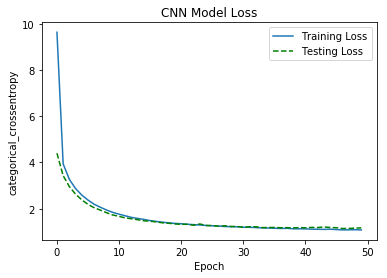

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('CNN Model Loss')
plt.ylabel('categorical_crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

In [12]:
#Converts one hot encoding to class
def ohe_to_class(r):
    return[np.argmax(c) for c in r]

In [13]:
#
#Print confusion matrix and classification report for the model. 
#

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

predict_all = model.predict_classes(np.array(X_test_uf))

y_true_class = ohe_to_class(y_test)

print('accuracy', accuracy_score(predict_all, y_true_class))

print('confusion_matrix')
print(confusion_matrix(predict_all, y_true_class))
print('classification_report\n\n'+classification_report(predict_all, y_true_class))


('accuracy', 0.66710000000000003)
confusion_matrix
[[625  11  47  11  14   6   1  11  41  18]
 [ 31 800   7   9   0   2   8  10  56 111]
 [ 56   3 482  35  50  34  24  24   7   8]
 [ 32  15  61 485  63 150  46  64  21  36]
 [ 50   6 116  76 657  68  53  82  17  10]
 [ 15   8 132 256  76 652  43 151   6  23]
 [ 18  14  96  69  72  40 811  16   8   9]
 [  5   1  17  20  49  25   3 621   6  13]
 [117  34  21  16  13  12   6   2 802  36]
 [ 51 108  21  23   6  11   5  19  36 736]]
classification_report

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       785
           1       0.80      0.77      0.79      1034
           2       0.48      0.67      0.56       723
           3       0.48      0.50      0.49       973
           4       0.66      0.58      0.62      1135
           5       0.65      0.48      0.55      1362
           6       0.81      0.70      0.75      1153
           7       0.62      0.82      0.71       760
        